In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.style
import scipy.stats as stats

In [2]:
df = pd.read_csv("D:/datasets/socialbuzz.csv")

In [3]:
df.head()

,Content ID,Reaction Type,Datetime,Content Type,Category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,07-11-2020 09:43,photo,studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,17-06-2021 12:22,photo,studying,negative,10
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,18-04-2021 05:13,photo,studying,negative,15
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,06-01-2021 19:13,photo,studying,negative,0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,23-08-2020 12:25,photo,studying,positive,30


In [4]:
df.describe()

,Score
count,24573.000000
mean,39.622553
std,26.043011
min,0.000000
25%,15.000000
50%,35.000000
75%,65.000000
max,75.000000


In [5]:
df.nunique()

Content ID         962
Reaction Type       16
Datetime         24010
Content Type         4
Category            16
Sentiment            3
Score               15
dtype: int64

          Category  Total_Score
0          animals        74965
9          science        71168
7   healthy eating        69339
12      technology        68738
6             food        66676


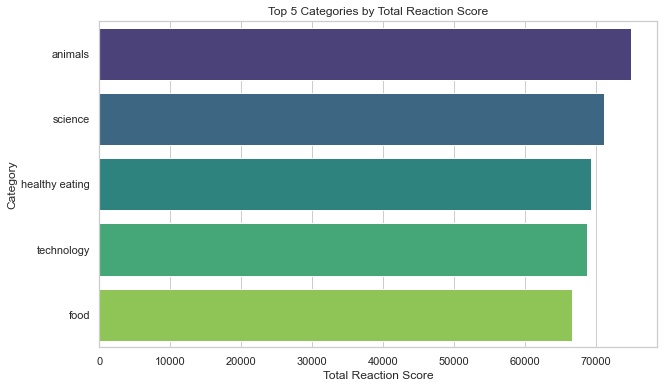

In [6]:
category_scores = df.groupby('Category')['Score'].sum().reset_index()
category_scores.columns = ['Category', 'Total_Score']

# Sort and select the top 5 categories
top_categories = category_scores.sort_values(by='Total_Score', ascending=False).head(5)
print(top_categories)

# Visualize the results
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='Total_Score', y='Category', data=top_categories, palette='viridis')
plt.title('Top 5 Categories by Total Reaction Score')
plt.xlabel('Total Reaction Score')
plt.ylabel('Category')
plt.show()

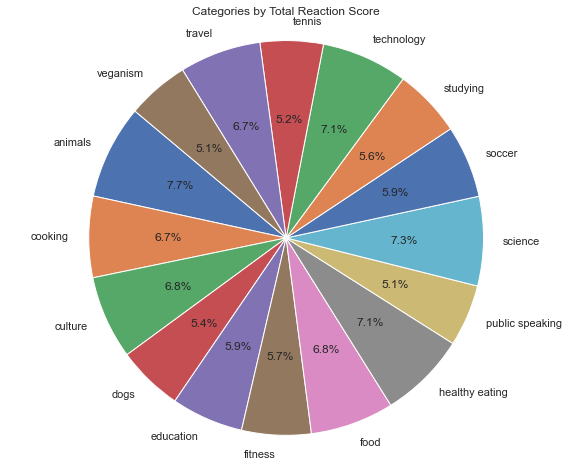

In [7]:
# Group data by 'Category' and calculate the sum of 'Score' for each category
category_scores = df.groupby('Category')['Score'].sum().reset_index()

# Plotting a pie chart for all categories
plt.figure(figsize=(10, 8))
plt.pie(category_scores['Score'], labels=category_scores['Category'], autopct='%1.1f%%', startangle=140)
plt.title('Categories by Total Reaction Score')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

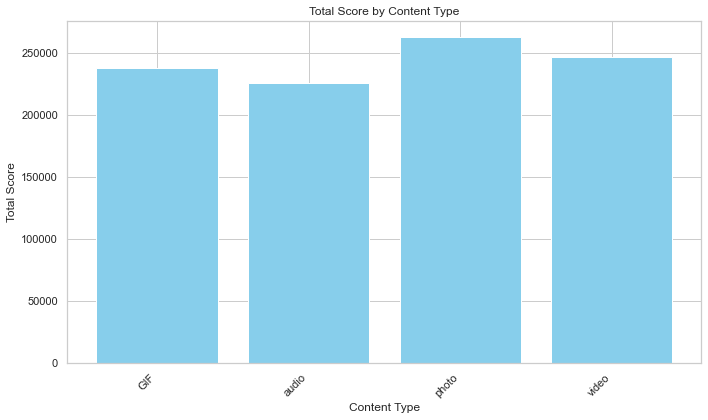

In [8]:
# Group data by 'Content Type' and calculate the sum of 'Score' for each content type
content_type_scores = df.groupby('Content Type')['Score'].sum().reset_index()

# Plotting a bar chart for content types and their total score
plt.figure(figsize=(10, 6))
plt.bar(content_type_scores['Content Type'], content_type_scores['Score'], color='skyblue')
plt.xlabel('Content Type')
plt.ylabel('Total Score')
plt.title('Total Score by Content Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()